In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
df = pd.read_csv('dataframes/google_places_data.csv')

In [3]:
train_df, test1_df = train_test_split(df, test_size=0.3, random_state=42)

test_df, val_df= train_test_split(test1_df, test_size=0.4, random_state=42)

# Data overview

This dataset is from Kaggle 'Location Intelligence Data' 

We have 46 more and less relevant features, which are:

1) business_id : unique google identifier for each business
2) phone_number : phone number associated with the business
3) name : the official name of the company on google maps
4) full_address: full postal address of the company
5) **latitude** and **longitude** : geographic coordinates
6) **review_count** and user_ratings_total (probably redundant) : total number of reviews on google
7) **rating** and google_rating (probably redundant) : user scale rating out of 5
8) **timezone** 
9) website : offical URL website
10) **category** : category of the business like restaurant, museum ...
11) claim_status: Indicates whether the business listing has been claimed by the owner on Google Maps
12) **plus_code** : A short code representing the area where the business is located, used for addressing without a street address
13) Columns like weekday_daytime : flag 0-1 indicating whether the business is operating at this time
14) **geo_cluster** : clustering identifier used to group similar businesses based on geographic or other clustering algorithms
15) **city**
16) **state**
16) veryfied 
17) **country** : country where business is located




### **Potential business goal**

Classify businesses "successiblity" and ability to continue functioning. We can sell the data to bigger corporations/individuals who are planning to invest in the region, specific countries or businesses.

For example, we will say what is the predicted business time of existence + profitability over the time (how much time it will continue providing their services, and their profitability)

* potential problem (question) - we don't have data for profitability and times of business existence - can we predict them without having them?

Another goal suggestion (paraphrasing?) - you're opening a spot, and you want to know how successful it's going to be. It's predicted "successibility" should be classified

In [8]:
df.columns

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

In [11]:
df.head(10)

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
5,0x4870bc8c914c47a3:0x66e3b59f807e9444,441213488000,Birmingham Museum & Art Gallery,"Birmingham Museum & Art Gallery, Chamberlain S...",52.480111,-1.903462,8266.0,4.5,Europe/London,https://www.birminghammuseums.org.uk/birmingha...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
6,0x47d870963894862d:0x7c69bf53a1c0382d,442070913067,IWM Duxford,"IWM Duxford, IWM Duxford Airfield, Cambridge C...",52.096465,0.136480,16076.0,4.8,Europe/London,http://www.iwm.org.uk/visits/iwm-duxford,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
7,0x394f21c4a3ba4d1b:0xfc12611877494d81,92405454554,Umerkot Fort Museum,"9P7P+4QG Umerkot Fort Museum, Moolchand Khati ...",25.364313,69.734297,473.0,4.1,Asia/Karachi,Unknown,...,0,0,0,0,0,0,0,0,0.0,Pakistan
8,0x488845d16be594e9:0x5258b27cf1ca9ffe,441412769599,Kelvingrove Art Gallery and Museum,"Kelvingrove Art Gallery and Museum, Argyle St,...",55.868589,-4.290604,19689.0,4.7,Europe/London,https://www.glasgowlife.org.uk/museums/venues/...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
9,0x487099fc92a3ad61:0x80fb90ace73738fb,441215579643,Black Country Living Museum,"Black Country Living Museum, Discovery Wy, Dud...",52.519917,-2.075433,11394.0,4.7,Europe/London,https://bclm.com/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom


We can see that although the number of NaN values is 0 there are some missing values represented as "Unknown"

In [118]:
len(df[df['website']=='Unknown'])

6256

Columns that are potentially irrelevant:
* business_id : it's unique for every business
* website URL : every business has it's own website, many missing values - what we can do ? Add a column that informs whether there is or there is no website
* phone_number : same as before

# EDA

We will now only look at train_df

In [12]:
train_df['country'].describe()

count                    10642
unique                     161
top       United Arab Emirates
freq                      6768
Name: country, dtype: object

In [13]:
train_df['city'].describe()

count     10642
unique     1509
top       Dubai
freq       4355
Name: city, dtype: object

In [14]:
train_df['timezone'].describe()

count          10642
unique            94
top       Asia/Dubai
freq            6622
Name: timezone, dtype: object

In [15]:
train_df['types'].describe()

count     10642
unique     3124
top       Hotel
freq        267
Name: types, dtype: object

In [16]:
train_df['types'].unique()

array(['Plumber, Air conditioning repair service, Carpenter, Electrician, Furniture maker, Masonry contractor, Painter, Handyman/Handywoman/Handyperson, Tile contractor',
       'Attorney',
       'Furniture store, Do-it-yourself shop, General store, Gift shop, Hobby store, Home goods store, Party store, Pet store, School supply store, Warehouse store',
       ...,
       'Zoo, Botanical garden, Event venue, Garden, Tourist attraction',
       'Used car dealer, Car dealer, Car finance and loan company, Truck dealer, Used truck dealer',
       'Visa and passport office, Legal affairs bureau, Notary public'],
      dtype=object)

Many types are very similar like : Car rental agency, car rental, Cars etc. Meybe it would be usefull to group them

**Maps**

In [9]:
df[df['latitude'].isna() | df['longitude'].isna()]

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
5355,0x80dd4a6f6bc3c0d1:0xa0dbcc9e52e67a7d,13105300994,"R Painting,License #752512",Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
5368,0x549175bad87e4499:0xe474185a7c812203,13608880460,IJB Painting Company,Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
7683,0x3e5f43a21c43cf97:0x5ab0bd09eee41976,971524175130,S&Y Travel Agency,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
8571,0xb2afb323ceda5e5:0x9616560c124aa170,971509014567,Luxury District Real Estate,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,NaN,United Arab Emirates
12398,0x886b5c66fee9323d:0x3aa2c26684beba68,18137481822,Election Roofing and Construction LLC,Unknown,NaN,NaN,1.0,4.0,America/New_York,https://election-roofing-and-construction-llc....,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates


We have 5 rows with missing geographical coordinates, they also have missing address so we can't fill in missing latitude and longitude, some of them propably have mistakes - timezone = America/Los Angeles but country = Emirates

In [25]:
coord_df = train_df.dropna(subset=['latitude','longitude']) # we want no missing values for plotting

c:\Users\rogal\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


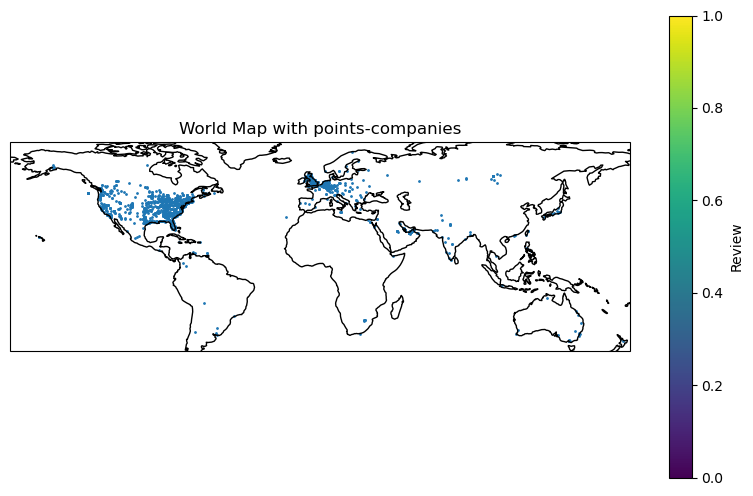

In [18]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot points colored by review ratings
sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], cmap='viridis', s=1, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, label='Review')
plt.title('World Map with points-companies')
plt.show()

In [19]:
 #checking for errors with Arab Emirates - they appear on the map in different countries
d1 = train_df[train_df['longitude']<0]
d1[d1['country']=='United Arab Emirates']

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
12483,0x297de3d2568de6f:0x4ab9dfcbbc6db42c,18596699018,Vic Roofing LLC,Unknown,38.939556,-84.540401,32.0,4.4,America/New_York,http://www.vicroofingllc.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
12406,0x2a6367b070b37603:0x87eac19b486acd30,16038369120,Lionshield Roofing Company,Unknown,43.003400,-71.348678,3.0,5.0,America/New_York,http://www.lionshieldroofing.com/,...,1,1,1,1,1,1,1,1,1.0,United Arab Emirates
5380,0x60c0e1be9e2a1677:0x46a969f19790b858,15615565713,Painter Realty Ventures,Unknown,35.905463,-86.847940,32.0,4.4,America/Chicago,Unknown,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
8341,0x880fad282398b4d1:0x7f2e7528fa123fbe,16308932600,Garry Real Estate,Unknown,41.881634,-88.091746,19.0,4.8,America/Chicago,https://garryrealestate.com/,...,1,1,1,1,1,1,1,1,1.0,United Arab Emirates
3464,0x88569101a9bc392d:0x92f2bb060b4d1070,19804988979,Your Laundry is Done,Unknown,35.169449,-80.839829,5.0,5.0,America/New_York,http://yourlaundryisdone.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,0x8b0ce9e253559e1b:0xd2507351bbfb35f7,447552977297,Precision Roofing Experts,Unknown,53.021939,-2.167563,9.0,5.0,Europe/London,Unknown,...,0,0,0,0,0,0,0,0,2.0,United Arab Emirates
7343,0x89e4294160b10d87:0x35575adbb52a6077,18607796531,PlanUrEscape - Cruise Planners Travel,Unknown,46.423669,-129.942709,53.0,5.0,America/New_York,http://www.planurescape.net/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
7339,0x89b7d38f338d8e31:0x41af984aa94d411a,13015450116,Travel Tom,Unknown,46.423669,-129.942709,33.0,5.0,America/New_York,https://www.facebook.com/TravelTomUSA/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
6374,0xa6c2c04154242d73:0x843000aeaf30f1e0,17042320092,Eleders' Best Bakery,Unknown,35.669160,-80.474029,32.0,4.4,America/New_York,http://www.eledersbest.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates


**Important observation: the 'country' column may have some mistakes. Many rows which are in USA (long, lat and timezone) have a contry UAE**

In [21]:
d =coord_df[(coord_df['latitude']>22) & (coord_df['latitude']<26)] # checking how many companies really are in UAE
d2=d[(d['longitude']>51) & (d['longitude']<56)]
d2

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
656,0x3e5f5924bf55881d:0xed1dfad1119255ba,971562561655,Lead Handyman Services,Lead Handyman Services - Street #22 - Industri...,25.324796,55.417346,13.0,5.0,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
3254,0x3e5f691e8db2acc1:0xc34533cd15082538,971569831111,Sunil Ambalavelil - Lawyer and Legal Consultan...,Sunil Ambalavelil - Lawyer and Legal Consultan...,25.188190,55.271341,6.0,5.0,Asia/Dubai,http://advsunil.com/,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1187,0x3e5f5bedee730051:0xde5875609a29156,97165506126,LIFE Pharmacy - Hala 7,LIFE Pharmacy - Hala 7 - Al Za'abi Building Ja...,25.319895,55.385263,136.0,4.5,Asia/Dubai,http://www.lifepharmacy.com/,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
15104,0x3e5f59cf98411d33:0x7397a5896919959,971542504677,درب لتاجير السيارات,درب لتاجير السيارات، بناية فؤاد الفحم محل رقم ...,25.384023,55.461907,149.0,4.9,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
11365,0x3e5f431cf70c9b67:0x7ba0e4d8889e8e1e,971501384888,N R I jewellery L.L.C,"N R I jewellery L.L.C, Gold Land Building - De...",25.273711,55.299922,42.0,4.8,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0x3e5f58bbd628df05:0x75c9155a8d44e43b,97165382902,Fasttrack Emarat Al Sharjah,Fasttrack Emarat Al Sharjah - E311 - Al Ruqa A...,25.345828,55.474626,127.0,4.3,Asia/Dubai,https://www.fasttrackemarat.com/,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
6265,0x3e5f42d4f450399d:0x4eaa3cb11674d860,97143579585,IVS Global Services,"IVS Global Services - 102, 103 & 104, Business...",25.244160,55.311825,802.0,2.9,Asia/Dubai,http://www.ivsglobalattestation.com/,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
11284,0x3e5f4343f602900f:0x1433edb6e9063ff4,97142260930,"Joyalukkas Jewellery, Br.1","Joyalukkas Jewellery, Br.1 - The Gold Centre -...",25.271120,55.297328,406.0,4.9,Asia/Dubai,http://www.joyalukkas.com/,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
5191,0x3ef5f7d7012b66f7:0xaeedca91a3bf9ca1,Unknown,Paradise Inn Hotel Ajman,Paradise Inn Hotel Ajman - Ajman Industrial 1 ...,25.387489,55.494438,299.0,3.1,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates


There are more than 6000 companies that are in UAE according to the latitude and longitude (it is not exact), our df has circa 10 000 rows so despite a few errors the majority of companies are in Emirates

## Maps

In [23]:
def plot_world(color_columns):
    fig, axes = plt.subplots(2,2,figsize=(15,6), subplot_kw={'projection': ccrs.PlateCarree()})
    for ax, column in zip(axes.flat, color_columns):
        ax.coastlines()
        sc = ax.scatter(coord_df['longitude'], coord_df['latitude'],c=coord_df[column], cmap='viridis', s=1, transform=ccrs.PlateCarree())
        plt.colorbar(sc, label=f'{column}')
        ax.set_title('World Map with '+f'{column}')
    plt.show()

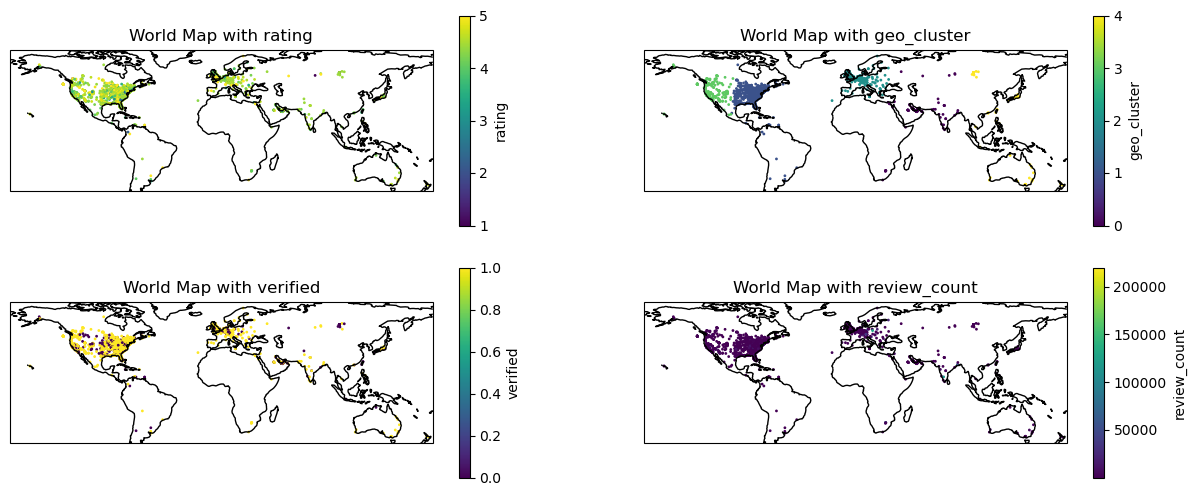

In [24]:
plot_world(['rating','geo_cluster','verified','review_count'])

Let's zoom on every continent, maybe we will see some patterns

In [27]:
def draw_map(color_columns, boundries): # function to pass also geographical boundries
    fig, axes = plt.subplots(2,2, figsize=(15,6),subplot_kw={'projection': ccrs.PlateCarree()})

    for ax, column in zip(axes.flat, color_columns):
        ax.coastlines()
        ax.set_extent(boundries)
        sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], c= coord_df[column],cmap='viridis', s=1, transform=ccrs.PlateCarree())

        plt.colorbar(sc, label=f'{column}')
        ax.set_title('Map with '+f'{column}')
    plt.show()

## USA maps

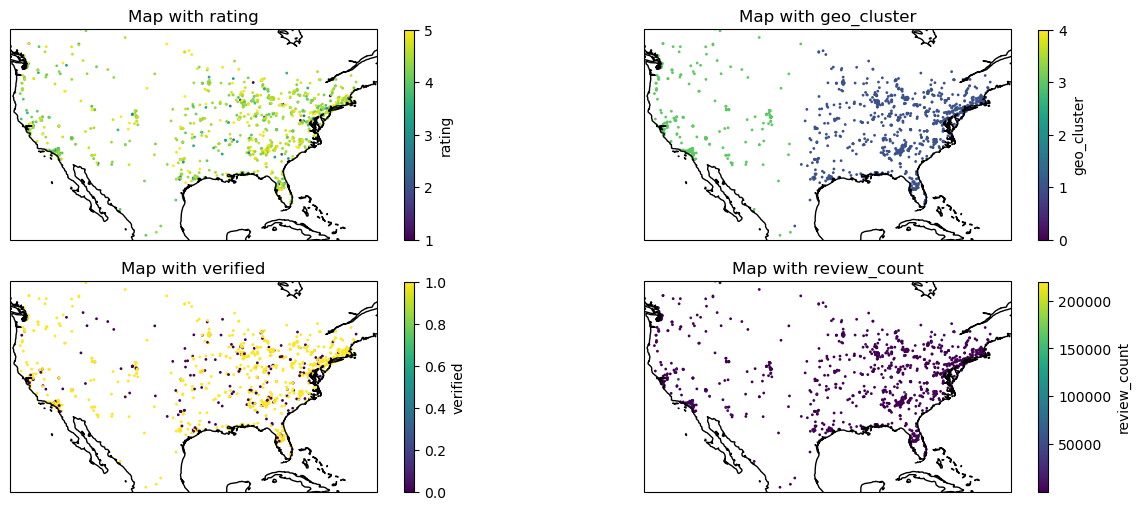

In [28]:
draw_map(['rating','geo_cluster','verified','review_count'], [-125, -66.5, 20, 50]) # USA

Observations:
* The majority of companies are on the east side
* There are not many observations with bad reviews
* all companies have <= 50k reviews
* more unverified comanies are on the east side

## Europe maps

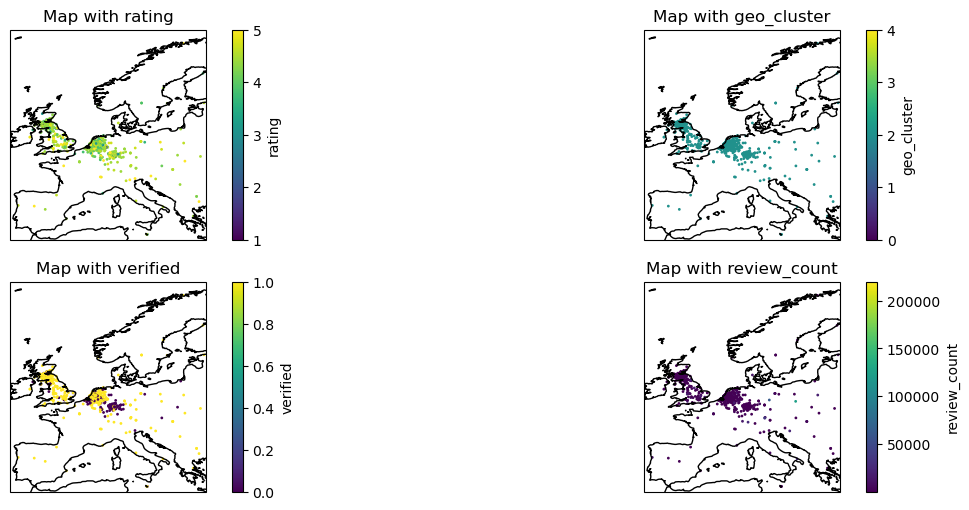

In [29]:
draw_map(['rating','geo_cluster','verified','review_count'],[-10, 25, 35, 72] )

For companies in Europe we have observed:
* most of them have <50k reviews
* most companies are on north-west and GB
* They have good (4-5 stars) reviews
* All of them have the same geo_cluster identifier
* We can see that the most copanies in middle-europe are unverified and in west verified
* there are not many companies in the east part of Europe

## West Asia maps

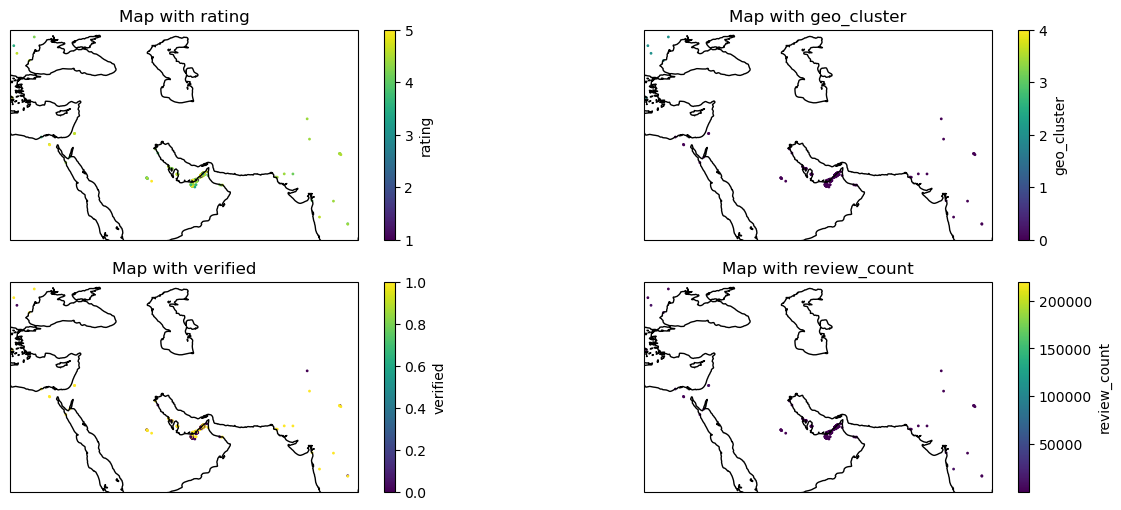

In [30]:
draw_map(['rating','geo_cluster','verified','review_count'],[25, 80, 15, 45] )

There are not many points, let's zoom on UAE

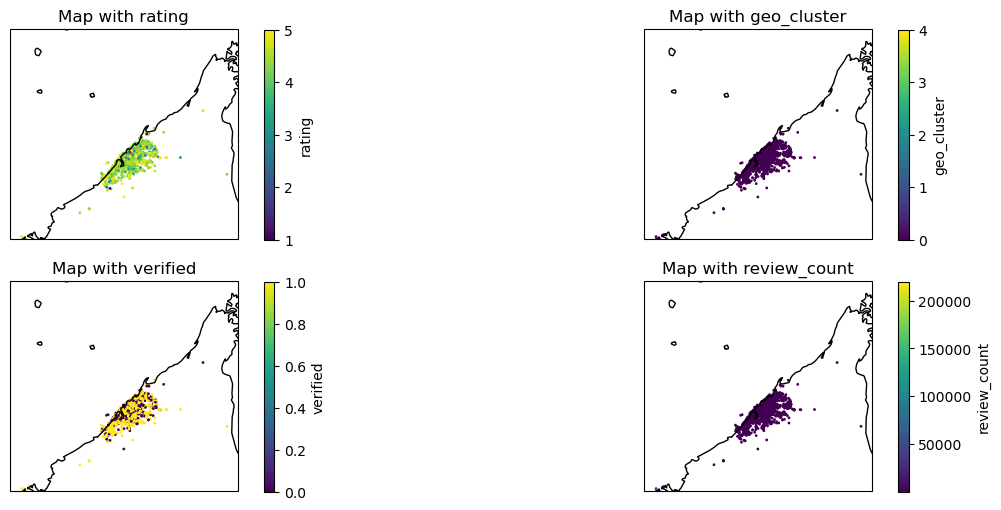

In [31]:
draw_map(['rating','geo_cluster','verified','review_count'],[54.25, 56.4167, 24.5, 26.5])

Observations:
* there are many companies near each other
* most of them have good ratings and have less than 50k reviews
* there are some unverified companies

## Asia maps

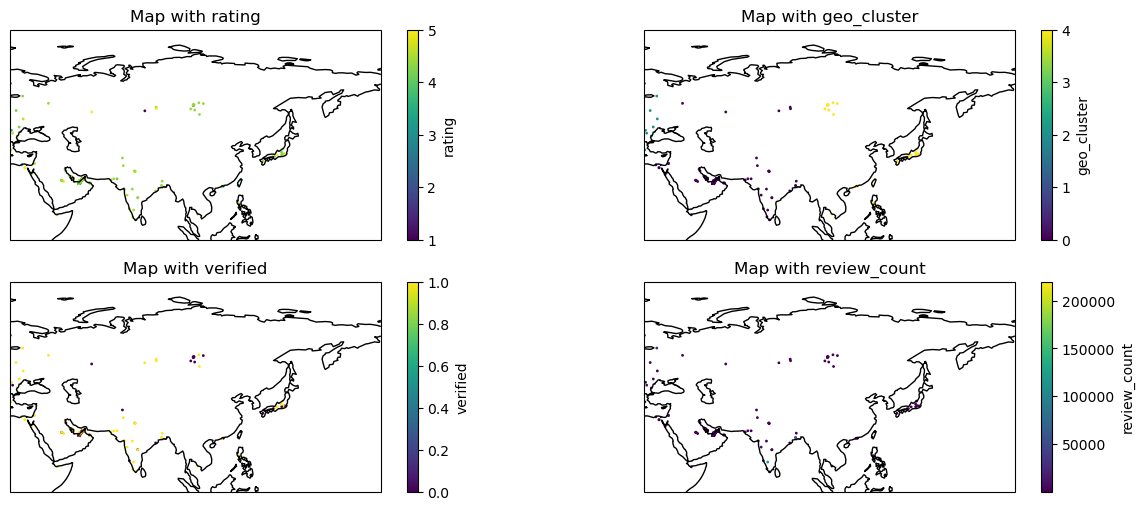

In [32]:
draw_map(['rating','geo_cluster','verified','review_count'],[25, 180, 0, 80])

Observations:
* someone created two clusters: west and east asia
* companies are on the north or south, not many in the middle (mountains) + japan
* there are more unverified companies in the north part
* there isn't an obvious pattern

## Australia maps

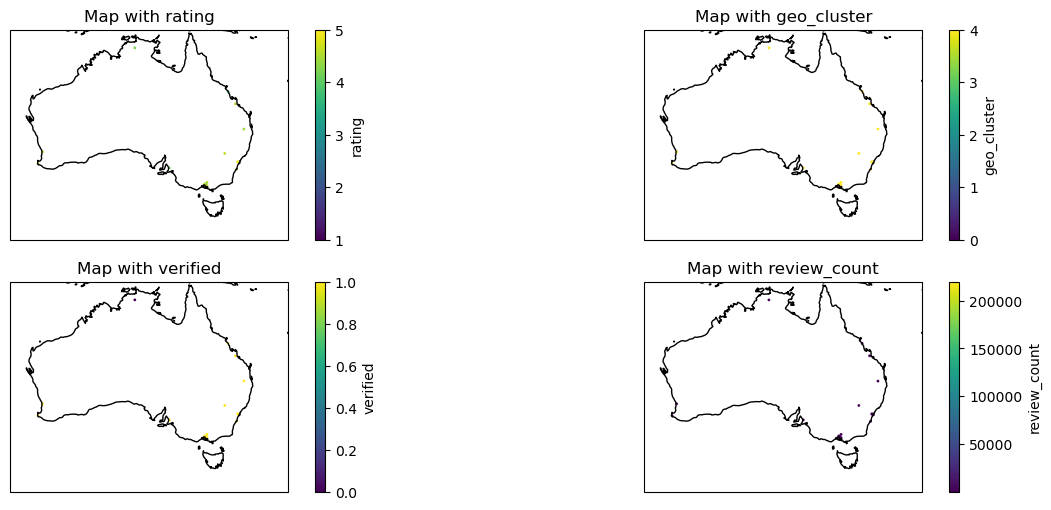

In [33]:
draw_map(['rating','geo_cluster','verified','review_count'],[110, 160, -45, -10])

There are very few companies in Australia, they are in the same cluster as east Asia

##

**Observations from maps:**
* the majority of companies are in West Asia
* Most of the companies have good ratings
* There are very few companies in east Asia,Australia, Africa and South America
* There is no clear pattern (except from geo_cluster which somebody grouped before)

## Potential correlations (regarding business goal)

In [34]:
df11 = train_df[['rating','geo_cluster']]
average_values_mean = df11.groupby('geo_cluster').mean()
average_values_median = df11.groupby('geo_cluster').median()

print("Mean avg ranking", average_values_mean, end = "\n\n")
print("Median avg ranking", average_values_median)

Mean avg ranking                rating
geo_cluster          
0.0          4.266129
1.0          4.415105
2.0          4.286458
3.0          4.345536
4.0          4.290909

Median avg ranking              rating
geo_cluster        
0.0             4.4
1.0             4.5
2.0             4.4
3.0             4.4
4.0             4.4


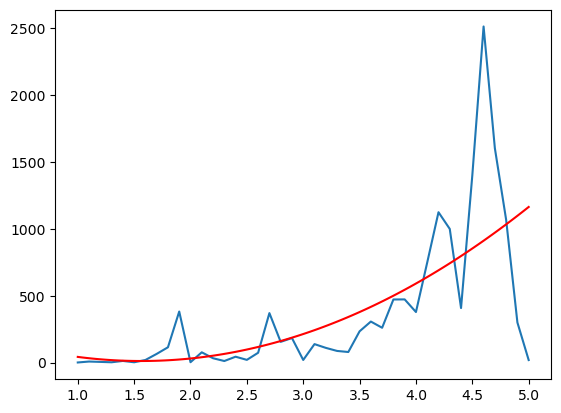

In [35]:
df11 = train_df[['rating','review_count']]
average_values_mean = df11.groupby('rating').mean()

z = np.polyfit(x=average_values_mean.index, y=average_values_mean['review_count'], deg=2)
p = np.poly1d(z)

x_trendline = np.linspace(average_values_mean.index.min(), average_values_mean.index.max(), 100)
y_trendline = p(x_trendline)

plt.plot(average_values_mean,label='Rating vs Review count')
plt.plot(x_trendline, y_trendline, color='red', label='Trendline')
plt.show()


In [36]:
df44 = train_df[['rating','website']]
df44.loc[df44['website'] != 'Unknown', 'website'] = 'Known'

average_values_mean = df44.groupby('website').mean()
average_values_mean

,rating
website,
Known,4.320026
Unknown,4.243462


**Observations**

* Business without website have slightly lower rating
* The bigger is the review count (number), the better is the ranking
* Geo cluster 1 has the best reviews (ranking), this cluster is for east american establishments

## Feature engineering

In [37]:
train_df['Known_Website'] = train_df["website"].apply(lambda x: 0 if x == "Unknown" else 1)  # new column 1 - if there is a website, 0 if not

In [38]:
train_df['Known_phone'] = train_df["phone_number"].apply(lambda x: 0 if x == "Unknown" else 1) # new column 1 if there is a phone number, 0 if not

In [39]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pycountry_convert as pc

from pprint import pprint
from typing import Tuple

from tqdm import tqdm
tqdm.pandas()

In [41]:
pc.country_alpha2_to_continent_code("RU") # new package test

'EU'

In [42]:
def get_continent_name(code):
    if code == "NA":
        return "North America"
    elif code =="SA":
        return "South America"
    elif code== "AS":
        return "Asia"
    elif code == "AF":
        return "Africa"
    elif code == "OC": 
        return "Oceania"
    elif code=="EU":
        return "Europe"
    elif code=="AQ" :
        return "Antarctica"

In [57]:
# za długo działa - znaleźć coś innego
def get_continent(lat,long): # function from : https://medium.com/bitgrit-data-science-publication/get-continent-names-from-coordinates-using-python-8560cdcfdfbb to get continent from latitude and longitude 
    locator = Nominatim(user_agent="FindContinent")
    location = locator.reverse(f"{lat}, {long}", language="en")
    if location is None:
        return "Unknown"
    address = location.raw['address']
    country_code = address['country_code'].upper()
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    return continent_code

Let's try to extract keywords from column Types (? for later)

In [15]:
# extract keywords
import re
from collections import Counter
keywords=[]
for line in train_df['types'].unique():
    if pd.notna(line):
        words = re.findall(r'\b\w+\b', line.lower())
        keywords.extend(words)

word_counts = Counter(keywords)
print(word_counts)


Counter({'store': 1771, 'service': 1181, 'shop': 622, 'restaurant': 619, 'dealer': 468, 'agency': 452, 'car': 424, 'repair': 302, 'clothing': 295, 'auto': 291, 'attorney': 289, 'clinic': 255, 'center': 253, 'tourist': 235, 'dental': 233, 'estate': 221, 'supplier': 218, 'attraction': 213, 'park': 207, 'jewelry': 205, 'real': 204, 'bar': 196, 'contractor': 181, 'used': 181, 's': 180, 'and': 179, 'furniture': 171, 'dentist': 170, 'pet': 165, 'hotel': 161, 'tour': 156, 'insurance': 149, 'museum': 144, 'company': 142, 'home': 134, 'designer': 124, 'school': 119, 'consultant': 119, 'law': 115, 'office': 109, 'medical': 109, 'salon': 108, 'church': 103, 'cafe': 98, 'bakery': 97, 'establishment': 97, 'rental': 96, 'supply': 95, 'coffee': 92, 'club': 91, 'flower': 91, 'beauty': 90, 'delivery': 89, 'painter': 88, 'maintenance': 82, 'venue': 79, 'firm': 78, 'art': 78, 'care': 77, 'hair': 75, 'health': 75, 'hospital': 74, 'accessories': 73, 'physical': 73, 'shoe': 72, 'cleaning': 72, 'interior': 6

In [13]:
import re
main_categories = ["Hotel","Restaurant","Shop","Service","Agency","Dealer","Repair","Car","Travel","Fitness","Health","Dental","RealEstate",
    "Office","Tourist","Attraction","Park","Attorney","Bank","Pharmacy","Supermarket","Bakery","Barbershop","Hospital","Library","Museum","Cinema",
    "Store","Jeweler","Beauty"
]

def classify_type(text): #klasyfikacja do jednej w powyższych kategorii
    for category in main_categories:
        if re.search(category, text, re.IGNORECASE):
            return category
    return 'Other'

train_df['main_category'] = train_df['types'].apply(classify_type)

In [23]:
d=train_df[train_df['main_category']=='Other']
#mamy tylko 3 tysiące obserwacji jako other: są to stacje policyjne, ATM, kościoły itd
train_df[['types','main_category']]

,types,main_category
656,"Plumber, Air conditioning repair service, Carp...",Service
3254,Attorney,Attorney
8116,"Furniture store, Do-it-yourself shop, General ...",Shop
1187,"Pharmacy, Baby store, Beauty product supplier,...",Pharmacy
15104,"Car rental agency, Car leasing service, Limous...",Service
...,...,...
5191,Hotel,Hotel
13418,"Used car dealer, Car dealer, Truck dealer, Use...",Dealer
5390,"Painter, Service establishment",Service
860,Bank,Bank


In this part we identified missing values, analysed the data and started to add some new columns. Main conclusions from this part:

* We have some missing values in website, phone number, address ...
* column that is to be dropped is business_id, as every business has unique ID so it doesn't help with grouping
* Situation is very similar with full address, website and phone number however we can classify companies as the ones which have a website/phone or don't
* We detected some mistakes in column Country, Timezone vs geographical coordinates so we will probably focus only on latitude and longitude when it comes to spacial aspect
* Column 'types' has many unique values, as types are given in different format. We tried to group them into fewer categories